In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers


In [34]:
df = pd.read_csv('https://res.cloudinary.com/daktccmqn/raw/upload/v1684995027/Crop_recommendation_dfltdn.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [35]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [36]:
# Return information about the datatype,
# NULL type of the columns of CSV file
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [37]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "label"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)

Label classes: ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple', 'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [38]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.20):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

1775 examples in training, 425 examples for testing.


In [39]:
! pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
% pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import tensorflow_decision_forests as tfdf

In [43]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [44]:
from IPython.display import display, HTML
# Set the cell height
display(HTML("<style>.container { height: 300px !important; }</style>"))

# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 2 thread(s) for training
Use /tmp/tmpaeo0y713 as temporary training directory
Reading training dataset...
Training tensor examples:
Features: {'N': <tf.Tensor 'data:0' shape=(None,) dtype=int64>, 'P': <tf.Tensor 'data_1:0' shape=(None,) dtype=int64>, 'K': <tf.Tensor 'data_2:0' shape=(None,) dtype=int64>, 'temperature': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'humidity': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'ph': <tf.Tensor 'data_5:0' shape=(None,) dtype=float64>, 'rainfall': <tf.Tensor 'data_6:0' shape=(None,) dtype=float64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'N': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'P': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'K': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_2:0' shape=(None,) dtype=float32>),

[INFO 23-06-08 11:18:25.6328 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-06-08 11:18:25.6328 UTC kernel.cc:774] Collect training examples
[INFO 23-06-08 11:18:25.6328 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-06-08 11:18:25.6330 UTC kernel.cc:393] Number of batches: 2
[INFO 23-06-08 11:18:25.6330 UTC kernel.cc:394] Number of examples: 1775
[INFO 23-06-08 11:18:25.6333 UTC kernel.cc:794] Training dataset:
Number of records: 1775
Number of columns: 8

Number of columns by type:
	NUMERICAL: 7 (87.5%)
	CATEGORICAL: 1 (12.5%)

Columns:

NUMERICAL: 7 (87.5%)
	0: "K" NUMERICAL mean:49.6479 min:5 max:205 sd:52.3156
	1: "N" NUME

Model trained in 0:00:03.212668
Compiling model...
Model compiled.


In [45]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 237ms/step - loss: 0.0000e+00 - accuracy: 0.9859

loss: 0.0000
accuracy: 0.9859


In [46]:
model_1.save("/content/my_saved_model")

In [50]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [51]:
model_1.summary()

Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	K
	N
	P
	humidity
	ph
	rainfall
	temperature

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "humidity"  0.370846 ################
    2.           "K"  0.368079 ###############
    3.           "N"  0.252795 #######
    4.    "rainfall"  0.229199 #####
    5.           "P"  0.210942 ####
    6. "temperature"  0.156744 
    7.          "ph"  0.150028 

Variable Importance: NUM_AS_ROOT:
    1. "humidity" 128.000000 ################
    2.        "K" 125.000000 ###############
    3.        "N" 38.000000 ####
    4.        "P"  5.000000 
    5. "rainfall"  4.000000 

Variable Importance: NUM_NODES:
    1.   

In [52]:
# The input features
model_1.make_inspector().features()

["K" (1; #0),
 "N" (1; #1),
 "P" (1; #2),
 "humidity" (1; #4),
 "ph" (1; #5),
 "rainfall" (1; #6),
 "temperature" (1; #7)]

In [53]:
model_1.make_inspector().evaluation()

Evaluation(num_examples=1775, accuracy=0.9943661971830986, loss=0.040735103346827166, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

In [54]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=675, accuracy=0.9718518518518519, loss=1.0145620444968895, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=1760, accuracy=0.9869318181818182, loss=0.1409598543986001, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=1775, accuracy=0.9898591549295774, loss=0.06349840510479161, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=1775, accuracy=0.9943661971830986, loss=0.042401003673882554, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=1775, accuracy=0.9949295774647887, loss=0.041693776302354435, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=1775, accuracy=0.9943661971830986, loss=0.0413394347546805

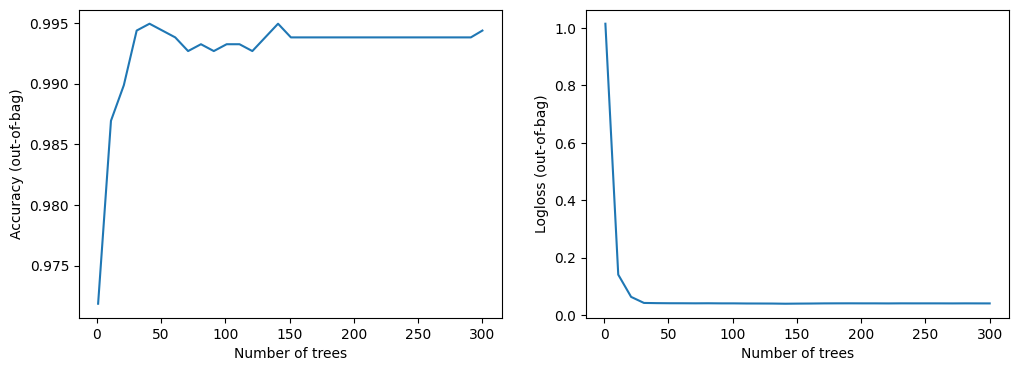

In [55]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

In [56]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,0


In [62]:
import tensorflow as tf
import numpy as np

# Membuat dictionary input
input_data = {
    "N": np.array([90]),
    "P": np.array([40]),
    "K": np.array([42]),
    "temperature": np.array([21]),
    "humidity": np.array([83]),
    "ph": np.array([7]),
    "rainfall": np.array([202])
}

# Melakukan prediksi menggunakan model
predictions = model_1.predict(input_data)

# Mendapatkan label yang cocok
predicted_label = predictions[0]

# Menampilkan label yang cocok
print("Label yang cocok: ", predicted_label)


1/1 [==============================] - 0s 100ms/step
Label yang cocok:  [0.9933325  0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00666667 0.        ]


In [67]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,21
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,21
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,21
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,21
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,21


In [68]:
import tensorflow as tf
import numpy as np

# Membuat dictionary input
input_data = {
    "N": np.array([107]),
    "P": np.array([35]),
    "K": np.array([33]),
    "temperature": np.array([27]),
    "humidity": np.array([66]),
    "ph": np.array([7]),
    "rainfall": np.array([175])
}

# Melakukan prediksi menggunakan model
predictions = model_1.predict(input_data)

# Mendapatkan label yang cocok
predicted_label = predictions[0]

# Daftar nama kelas
class_names = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans', 'mungbean', 'blackgram',
               'lentil', 'pomegranate', 'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
               'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']

# Mencari indeks dengan nilai prediksi tertinggi
predicted_index = np.argmax(predicted_label)

# Mengambil nama kelas yang sesuai dengan indeks
predicted_class = class_names[predicted_index]

# Menampilkan hasil prediksi
print("Predicted class: ", predicted_class)


1/1 [==============================] - 0s 59ms/step
Predicted class:  coffee


In [71]:
%pip install tensorflow tensorflow_decision_forests 'tensorflowjs>=4.4.0'

# Prepare and load the model with TensorFlow
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import tensorflowjs as tfjs
from google.colab import files

# Load the model with Keras
model = tf.keras.models.load_model("/content/my_saved_model")

# Convert the keras model to TensorFlow.js
tfjs.converters.tf_saved_model_conversion_v2.convert_keras_model_to_graph_model(model, "./tfjs_model")

# Download the converted TFJS model
!zip -r tfjs_model.zip tfjs_model/
files.download("tfjs_model.zip")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
'NoneType' object has no attribute 'name'


weight random_forest_model_1/StatefulPartitionedCall/StatefulPartitionedCall/RaggedConstant/Const with shape (1,) and dtype int64 was auto converted to the type int32
weight random_forest_model_1/StatefulPartitionedCall/StatefulPartitionedCall/RaggedConstant/Const_1 with shape (1,) and dtype int64 was auto converted to the type int32
  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 6%)
  adding: tfjs_model/model.json (deflated 88%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>